# COS30049 Assignment 2 - Group 8


## Data Processing
### Importing requirements

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the first dataset into a dataframe
The first dataset we will be loading is the email dataset, this dataset is provided publicly on Kaggle but will require some cleaning and normalization before it can be used.

In [43]:
# Load the dataset into a dataframe
email_df = pd.read_csv('datasets/completeSpamAssassin.csv', index_col=0)
print(email_df.info())
print(email_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6046 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 141.7+ KB
None
                                                Body  Label
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3  ##############################################...      1
4  I thought you might like these:\n1) Slim Down ...      1


### Data Cleaning: Removing rows with missing values

Based on the documentation provided with the dataset on Kaggle, 9% of rows have 'empty' as the 'Body' part of the row. This isn't going to be very helpful for our model training therefore we must remove these rows from the dataset.

In [44]:
# Removal of the rows with 'empty' in the 'Body' column
email_df = email_df[email_df['Body'] != 'empty']

email_df = email_df.dropna()

print(len(email_df))

5512


### Loading the second dataset into a new dataframe
The second dataset which will be used is the spam SMS dataset also provided on Kaggle. This dataset appears to be clean already and ready to use apart from having a different way of identifying whether the message is spam or not. This dataset uses 'spam' and 'ham' to identify whether its spam or not as opposed to the first dataset using 1 and 0.

In [45]:
# Loading the second dataset into a new dataframe
sms_df = pd.read_csv('datasets/spam.csv', encoding='latin-1')
print(sms_df.info())
print(sms_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN 

In [46]:
# Keep only the columns we need and rename them to match the first dataframe
sms_df = sms_df[['v1', 'v2']]
sms_df = sms_df.rename(columns={'v1': 'Label', 'v2': 'Body'})

# Map 'spam' to 1 and 'ham' to 0
sms_df['Label'] = sms_df['Label'].map({'spam': 1, 'ham': 0})

### Joining the two dataframes together

In [47]:
df = pd.concat([email_df, sms_df], ignore_index=True)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    11084 non-null  object
 1   Label   11084 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.3+ KB
None
                                                Body  Label
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3  ##############################################...      1
4  I thought you might like these:\n1) Slim Down ...      1


## Data Analysis
### Bar chart to visualise the number of spam messages vs non spam messages

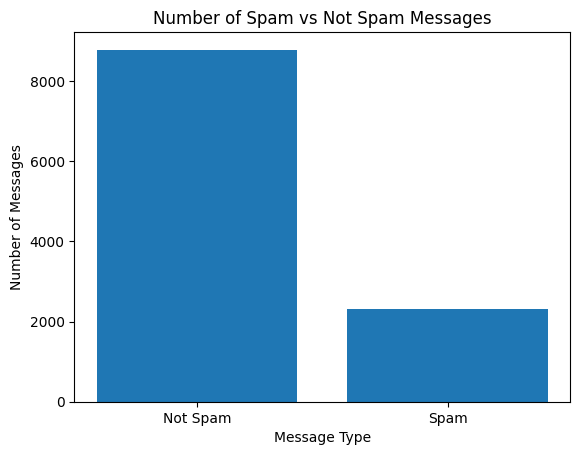

In [48]:
occurence_counts = df['Label'].value_counts()
plt.bar(occurence_counts.index, occurence_counts.values)
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.title('Number of Spam vs Not Spam Messages')
plt.show()